<a href="https://colab.research.google.com/github/hqcodes/hqprojects/blob/master/Hamoyes_QuizA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import all needed modules
%matplotlib inline
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
#reading data in csv format
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
data = pd.read_csv(url)
data.sample(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
6411,f1_fuel_1999_12_68_2_4,68,1999,greens bayou,gas,mcf,1432918.0,1.029000,262.300,262.500,2.548
28863,f1_fuel_2018_12_159_0_10,159,2018,mcmeekin,gas,mcf,6069577.0,1.026000,5.280,5.280,5.146
22533,f1_fuel_2012_12_146_0_3,146,2012,schiller,oil,bbl,9140.0,5.826198,73.883,67.963,12.682
22381,f1_fuel_2012_12_95_0_3,95,2012,r.m. heskett,waste,ton,446.0,0.015000,43.108,62.245,1.437
16392,f1_fuel_2007_12_108_2_10,108,2007,harry allen 4,gas,mcf,483388.0,1.046772,6.074,6.074,5.803
22515,f1_fuel_2012_12_44_3_4,44,2012,superior,oil,bbl,176.0,5.778192,106.522,123.039,18.435
21116,f1_fuel_2011_12_147_0_4,147,2011,four corners (1),coal,ton,691374.0,17.602000,30.700,30.700,1.740
28652,f1_fuel_2018_12_186_0_1,186,2018,altavista,gas,mcf,17179.0,1.040000,15.810,15.810,15.200
3283,f1_fuel_1996_12_119_0_2,119,1996,michigan city,gas,mcf,756059.0,1.020000,3.880,3.880,3.799
9058,f1_fuel_2001_12_20_0_1,20,2001,e. d. edwards,coal,ton,1702409.0,22.548000,36.629,37.008,1.610


In [58]:
# shape of data 
print(data.shape)

(29523, 11)


Question ONE

In [15]:
A = [1, 2, 3, 4, 5, 6]
B= [13, 21, 34]
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [19]:
# QUESTION TWO identity matrix
A= np.identity(3)
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [30]:

data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

Text(0.5, 0, 'Fuel Type')

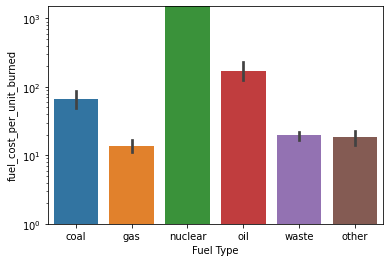

In [28]:
b_plot = sns.barplot(data=data, x='fuel_type_code_pudl', y='fuel_cost_per_unit_burned')
b_plot.set_yscale('log')
b_plot.set_ylim(1,1500)
b_plot.set_xlabel('Fuel Type')

In [31]:
data.fuel_mmbtu_per_unit.describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [32]:
data.fuel_qty_burned.skew()

15.851495469109503

In [33]:
data.fuel_qty_burned.kurtosis()

651.3694501337732

In [35]:
data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [44]:
total_fuel_unit = data.fuel_unit.count()
missing_fuel_unit = data.fuel_unit.isna().sum()
print('The percentage for of missing value is: ',(missing_fuel_unit/total_fuel_unit)*100)

The percentage for of missing value is:  0.6134342091810653


In [46]:
#differentiate numerical and categorical data
categorical_features = data.select_dtypes(include='object').columns.to_list()
numerical_features = data.select_dtypes(include='number').columns.to_list()
print('Categorical features: ', categorical_features)
print('Numerical features: ', numerical_features)

Categorical features:  ['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']
Numerical features:  ['utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


In [47]:
data['fuel_unit'] = data.groupby(['fuel_type_code_pudl'])['fuel_unit'].transform(lambda x: x.fillna(x.mode()[0]))

In [48]:
data.isna().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [69]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [65]:
data.groupby(['report_year'])['fuel_cost_per_unit_delivered'].sum().nlargest()

report_year
1997    1.218738e+07
1996    1.000602e+07
2000    1.352903e+06
2009    7.975923e+05
2018    4.748057e+05
Name: fuel_cost_per_unit_delivered, dtype: float64